# Yaozhong Zhang project 1 

## initial

This image is: <class 'numpy.ndarray'> with dimensions (540, 960, 3)


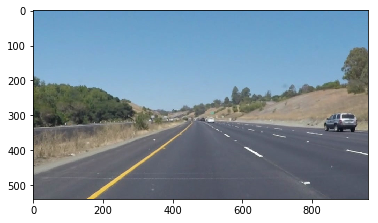

In [20]:
#finally finishing all download, troubleshotting, setting and environment.
#a little confusing for a mechanical guy
#here we go
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

#reading in an image
image = mpimg.imread('test_images/solidYellowCurve.jpg')
print('This image is:', type(image), 'with dimensions',image.shape)
plt.imshow(image) 



## Lane Detection

### canny edge

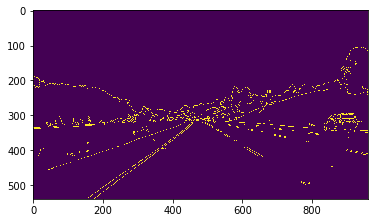

In [21]:
# Read it as a gray image
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)

#Canny edge function
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray,low_threshold, high_threshold)
plt.imshow(edges)

### masking

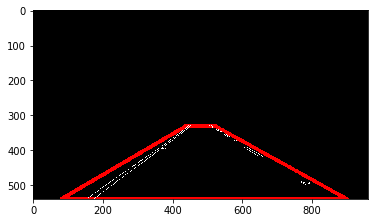

In [29]:
mask = np.zeros_like(edges)
ignore_mask_color = 255

imshape = image.shape
vertices = np.array([[(80,imshape[0]),(440, 330), (imshape[1]-440, 330), (imshape[1]-60,imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

#to show the result so far (masking)
line_image = np.copy(image)*0
cv2.line(line_image,(80,imshape[0]),(440, 330),(255,0,0),10)
cv2.line(line_image,(440, 330),(imshape[1]-440, 330),(255,0,0),10)
cv2.line(line_image,(imshape[1]-440, 330),(imshape[1]-60,imshape[0]),(255,0,0),10)
cv2.line(line_image,(imshape[1]-60,imshape[0]),(80,imshape[0]),(255,0,0),10)

color_edges = np.dstack((masked_edges,masked_edges,masked_edges))
combo = cv2.addWeighted(color_edges,1.0,line_image,1.0,0)
plt.imshow(combo)

### hough transformation

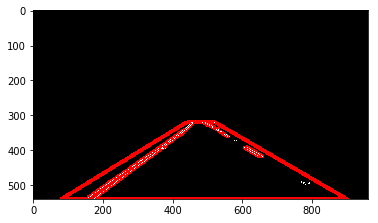

In [28]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1.1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 3     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 35 #minimum number of pixels making up a line
max_line_gap = 10   # maximum gap in pixels between connectable line segments
#line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)

#show hough transformation results
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
color_edges = np.dstack((masked_edges,masked_edges,masked_edges))
combo2 = cv2.addWeighted(color_edges,1.0,line_image,1.0,0)
plt.imshow(combo2)

### extrapolate

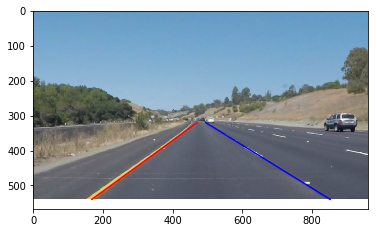

In [24]:
leftline=[]
rightline=[]
leftintercept=[]
rightintercept=[]

for line in lines:
    for x1,y1,x2,y2 in line:
        if (y2-y1)/(x2-x1)>0:
            rightline.append((y2-y1)/(x2-x1))
            rightintercept.append(y2-((y2-y1)/(x2-x1))*x2)
        else:
            leftline.append((y2-y1)/(x2-x1))
            leftintercept.append(y2-((y2-y1)/(x2-x1))*x2)
            
# get left/right average slope

sum = 0
for i in leftline:
    sum = sum +i
a_leftline = sum/len(leftline)

sum = 0
for i in rightline:
    sum = sum +i
a_rightline = sum/len(rightintercept)

sum = 0
for i in leftintercept:
    sum = sum +i
a_leftintercept = sum/len(leftintercept)

sum = 0
for i in rightintercept:
    sum = sum +i
a_rightintercept = sum/len(rightintercept)

# x = np.linspace(0,960,960)
# y_l = a_leftline*x + a_leftintercept
# y_r = a_rightline*x + a_rightintercept
# plt.imshow(image)
# plt.plot(x,y_l,'r')
# plt.plot(x,y_r,'b')

y = np.linspace(320,540,100)
x_l = (y-a_leftintercept)/a_leftline
x_r = (y-a_rightintercept)/a_rightline
plt.imshow(image)
plt.plot(x_l,y,'r')
plt.plot(x_r,y,'b')